# Arbol de decision con scikit-learn

## Importamos las librerias principales

In [149]:
# Manipulacion de datos
import numpy as np
import pandas as pd
# Graficas
import matplotlib.pyplot as plt
import seaborn as sns
# Balanceo
from imblearn.combine import SMOTEENN

from imblearn.under_sampling import RandomUnderSampler

# Division de datos
from sklearn.model_selection import train_test_split, GridSearchCV

# Creacion del modelo de arbol de decision
from sklearn.tree import DecisionTreeClassifier

# Metricas del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



sns.set_theme(style="whitegrid", palette="muted", context='notebook')

Utilizaremos el [dataset Titanic de Standford](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

## Cargamos el dataset a utilizar

In [15]:
df = pd.read_csv('../data/titanic.csv', sep=',')

# Analisis Exploratorio de datos

## Atributos del dataset

El conjunto de datos Titanic de CS109 contiene 887 observacioes y 8 variables

- Survived (Sobrevivió): indica si el pasajero sobrevivió al hundimiento del Titanic (0 = No, 1 = Sí).

- Pclass (Clase de pasajero): indica la clase del pasajero (1 = 1ª clase, 2 = 2ª clase, 3 = 3ª clase).

- Sex (Género): el género del pasajero (Masculino o Femenino).

- Age (Edad): la edad del pasajero en años.

- Siblings/Spouses Aboard (Hermanos/Cónyuges a bordo): el número de hermanos/cónyuges del pasajero que también estaban a bordo del Titanic.

- Parents/Children Aboard (Padres/Hijos a bordo): el número de padres/hijos del pasajero que también estaban a bordo del Titanic.

- Fare (Tarifa): la tarifa pagada por el pasajero por su viaje en el Titanic.

Visualizacion del DataFrame

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Eliminamos las columnas que no nos interesan `Name, Fare`

Se eliminará la columna "Fare" ya que esta información está altamente correlacionada con la columna "Pclass" que nos indica la lase social del pasajero. Además, se eliminará la columna "Name" ya que no es relevante para el análisis que se realizará.

In [17]:
columns_to_drop = ['Name', 'Fare']

df.drop(columns_to_drop, axis='columns', inplace=True)

Renombramos las columnas

In [18]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Analizamos las observaciones y variables

In [19]:
print(df.shape)

(887, 6)


Visualizamos los tipos de datos

In [20]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

Cambiamos el tipo de dato de sex a binario

In [21]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True, dtype=int)

In [22]:
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male      int64
dtype: object

In [23]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


Se modifico el nombre de `sex` a `Sex_male` tenemos que volver a ponerle el nombre original

In [24]:
df.rename(columns={'Sex_male': 'Sex'}, inplace=True)

- Sex = 1 = Male

- Sex = 0 = Female

Ordenar las columnas por nombres

In [25]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


# Entrenamiento de arbol de decision con Scikit-learn

Separar mi variable target de todas aquellas que no forman el target

In [26]:
# Todas las variables excepto la target
X = df.drop('Survived', axis=1)

# Variable target a predecir
y = df['Survived']

Veamos la proporcion del la variable target

In [30]:
df['Survived'].value_counts(normalize=True) * 100

Survived
0    61.443067
1    38.556933
Name: proportion, dtype: float64

Balanceamos los datos

In [33]:
sme = SMOTEENN(sampling_strategy=0.99, random_state=42)

X_res, y_res = sme.fit_resample(X, y)

# Como se encuentra destribuidos luego del balanceo

Resampled dataset shape Counter({1: 325, 0: 275})


In [34]:
y_res.value_counts(normalize=True) * 100

Survived
1    54.166667
0    45.833333
Name: proportion, dtype: float64

In [53]:
under_sample = RandomUnderSampler(random_state=42)

X_under, y_under = under_sample.fit_resample(X, y)

In [54]:
y_under.value_counts(normalize=True) * 100

Survived
0    50.0
1    50.0
Name: proportion, dtype: float64

Dividir el dataset en porcentaje

- **30% para TEST**

- **70% para TRAIN**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.30, random_state=42)

## Creacion del modelo

Hiper parametros

In [56]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2, 3, 4, 5, 6]
}

Definir el clasificador y los valores de los hiper parametros a probar

In [66]:
clf = DecisionTreeClassifier(random_state=42)
# Realizar la busqueda de hiperparametros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, scoring='accuracy', return_train_score=True)

Entrenamiento del modelo

In [67]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6]},
             return_train_score=True, scoring='accuracy')

Ver los puntajes de cada criterion y la profundidad

In [74]:

for params, mean_score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    print(f"Parametros: {params}\n")
    print("="*70)
    print(f"Mean Score: {mean_score}")

Parametros: {'criterion': 'gini', 'max_depth': 2}

Mean Score: 0.7657801418439716
Parametros: {'criterion': 'gini', 'max_depth': 3}

Mean Score: 0.7762411347517729
Parametros: {'criterion': 'gini', 'max_depth': 4}

Mean Score: 0.7908687943262411
Parametros: {'criterion': 'gini', 'max_depth': 5}

Mean Score: 0.7804078014184398
Parametros: {'criterion': 'gini', 'max_depth': 6}

Mean Score: 0.7677748226950354
Parametros: {'criterion': 'entropy', 'max_depth': 2}

Mean Score: 0.7657801418439716
Parametros: {'criterion': 'entropy', 'max_depth': 3}

Mean Score: 0.7762411347517729
Parametros: {'criterion': 'entropy', 'max_depth': 4}

Mean Score: 0.7887854609929078
Parametros: {'criterion': 'entropy', 'max_depth': 5}

Mean Score: 0.7845744680851064
Parametros: {'criterion': 'entropy', 'max_depth': 6}

Mean Score: 0.7761081560283687
Parametros: {'criterion': 'log_loss', 'max_depth': 2}

Mean Score: 0.7657801418439716
Parametros: {'criterion': 'log_loss', 'max_depth': 3}

Mean Score: 0.7762411347

Imprimir los mejores resultados

In [75]:
print(f"Mejores hiperParametros encontrados: {grid_search.best_params_}")
print("-"*50)
print(f"Mejor puntuacion de valudacion cruzada: {grid_search.best_score_}\n")

Mejores hiperParametros encontrados: {'criterion': 'gini', 'max_depth': 4}
--------------------------------------------------
Mejor puntuacion de valudacion cruzada: 0.7908687943262411



Modelo decision tree con parametros optimizados

In [76]:
best_clf = grid_search.best_estimator_

print(best_clf)

DecisionTreeClassifier(max_depth=4, random_state=42)


Mejores parametros para nuestro modelo

- max_depth=4

- random_state=42

# Evaluacion del modelo

Calculo de las prediciones en Train y TesT

In [150]:
y_train_pred = best_clf.predict(X_train)

y_test_pred = best_clf.predict(X_test)

Graficamos la matriz de  confusion

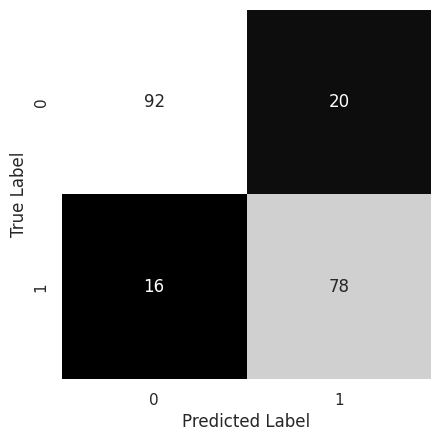

In [154]:
cm = confusion_matrix(y_test, y_test_pred, labels=best_clf.classes_)

sns.heatmap(cm, annot=True, fmt="d", cmap='gray', square=True, cbar=False)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

## Calculo de las metricas

- Calculando el accuracy en Train

- Calculando el accuracy en Test

In [140]:
# Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy: ", train_accuracy)
print("-"*60)
print("Test accuracy: ", test_accuracy)

Train accuracy:  0.8179916317991632
------------------------------------------------------------
Test accuracy:  0.8252427184466019


Verificamos el feature importaces

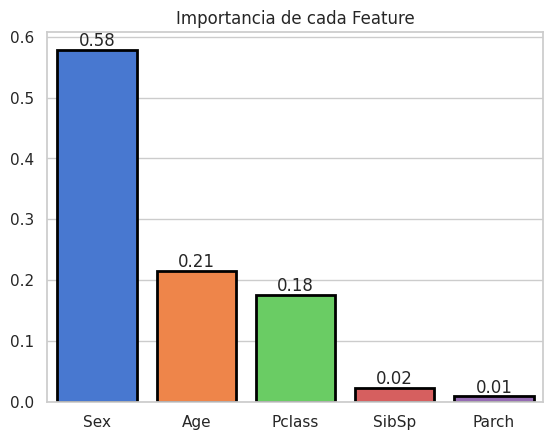

In [148]:
# Vamos a ordenar las importancias
importances = best_clf.feature_importances_


# Todas las variables que no son el target
columns = X.columns

# Creacion de un DataFrame con las variables y sus importancias
# Ordenar el DataFrame por importancia en orden descendente

df_scores = pd.DataFrame(pd.Series(importances, index=columns).sort_values(ascending=False)).T


# anotaciones
for index, value in enumerate(df_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')

# # Gracion del barplot
sns.barplot(data=df_scores, saturation=2.0, edgecolor="black", linewidth=2)
plt.title("Importancia de cada Feature")
plt.show()

- Podemos observar que para la clasificación del modelo en base a la variable target: `Survived`, los **features más importantes** son: *Sex, seguido de Age y luego de Pclass*.

- **SibSp** y **ParCh no tienen un impacto significativo** en la capacidad del modelo para predecir la variable objetivo, *se podrían eliminar sin afectar la capacidad de predicción.*

- Es importante destacar que se observa una performance parecida en la métrica de **Accuracy** para los datos de **Train** y de **Test**, lo cual es claramente positivo para nuestro modelo.